In [1]:
#configure a temp run engine environment

from bluesky import RunEngine

RE = RunEngine({})

from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

#Get the databroker https://gist.github.com/untzag/53281819709b1058c7708a250cbd3676
from databroker.v2 import temp
db = temp()

# Insert all metadata/data captured into db.
RE.subscribe(db.v1.insert)

1

In [3]:
from ophyd import Device, EpicsMotor
from ophyd import Component as Cpt

class StageXY(Device):
    x = Cpt(EpicsMotor, ':mx')
    y = Cpt(EpicsMotor, ':my')
    z = Cpt(EpicsMotor, ':mz')
    
stage = StageXY('SISSY2EX:motor0', name='stage')
stage.wait_for_connection()

In [4]:
stage.y.move(1000)

MoveStatus(done=True, pos=stage_y, elapsed=2.3, success=True, settle_time=0.0)

In [9]:
from bluesky.plan_stubs import mv

RE(mv(stage.y,1000,stage.x,1000,stage.z,1000))

()

In [10]:
RE(mv(stage.y,2000,stage.x,2000,stage.z,2000))

()

In [12]:

pos=3000


RE(mv(stage.y,pos,stage.x,pos,stage.z,pos))

()

In [33]:
from ophyd import Device, EpicsSignalRO, DeviceStatus

class temp_sens(Device):
    
    temp = Cpt(EpicsSignalRO, ':mx-PS-TEMPERATURE', kind='hinted')

    
x_temp = temp_sens('SISSY2EX:motor0', name = 'temp_sense')

x_temp.wait_for_connection()



Transient Scan ID: 4     Time: 2021-08-09 16:17:04
Persistent Unique Scan ID: 'b27a6bde-b2de-4dfa-9b5b-66c4f282add9'
New stream: 'primary'
+-----------+------------+------------+-----------------+
|   seq_num |       time |    stage_x | temp_sense_temp |
+-----------+------------+------------+-----------------+
|         1 | 16:17:09.9 | -1000.00000 |            54.2 |
|         2 | 16:17:10.4 | -979.84375 |            54.9 |
|         3 | 16:17:11.3 | -959.53125 |            54.9 |
|         4 | 16:17:12.0 | -939.37500 |            55.1 |
|         5 | 16:17:12.8 | -919.21875 |            55.3 |
|         6 | 16:17:13.5 | -899.06250 |            55.4 |
|         7 | 16:17:14.3 | -878.75000 |            55.4 |
|         8 | 16:17:15.0 | -858.59375 |            55.5 |
|         9 | 16:17:15.8 | -838.43750 |            55.6 |
|        10 | 16:17:16.5 | -818.12500 |            55.6 |
|        11 | 16:17:17.3 | -797.96875 |            55.6 |
|        12 | 16:17:18.0 | -777.81250 |       

('b27a6bde-b2de-4dfa-9b5b-66c4f282add9',)

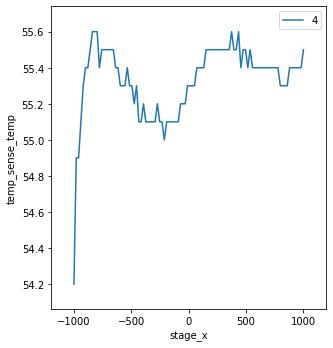

In [53]:
from bluesky.plans import scan

RE(scan([x_temp],stage.x,-1000,1000,100))


In [17]:
run = db[-1]

In [19]:
run.primary.metadata



{'start': {'uid': '75aaae5a-bc50-4102-a7a0-ff0e4b31b909',
  'time': 1628513609.0485752,
  'versions': {'ophyd': '1.6.0', 'bluesky': '1.6.7'},
  'scan_id': 1,
  'plan_type': 'generator',
  'plan_name': 'scan',
  'detectors': ['temp_sense'],
  'motors': ['stage_x'],
  'num_points': 100,
  'num_intervals': 99,
  'plan_args': {'detectors': ["temp_sens(prefix='SISSY2EX:motor0', name='temp_sense', read_attrs=['temp'], configuration_attrs=[])"],
   'num': 100,
   'args': ["EpicsMotor(prefix='SISSY2EX:motor0:mx', name='stage_x', parent='stage', settle_time=0.0, timeout=None, read_attrs=['user_readback', 'user_setpoint'], configuration_attrs=['user_offset', 'user_offset_dir', 'velocity', 'acceleration', 'motor_egu'])",
    -1000,
    1000],
   'per_step': 'None'},
  'hints': {'dimensions': [[['stage_x'], 'primary']]},
  'plan_pattern': 'inner_product',
  'plan_pattern_module': 'bluesky.plan_patterns',
  'plan_pattern_args': {'num': 100,
   'args': ["EpicsMotor(prefix='SISSY2EX:motor0:mx', name=

In [23]:
stage.x.velocity.set(3000)

Status(obj=EpicsSignal(read_pv='SISSY2EX:motor0:mx.VELO', name='stage_x_velocity', parent='stage_x', value=1000.0, timestamp=1628513683.967047, tolerance=1e-05, auto_monitor=True, string=False, write_pv='SISSY2EX:motor0:mx.VELO', limits=False, put_complete=False), done=False, success=False)

In [22]:
stage.x.velocity.get()

1000.0

In [51]:
# Test Homing

stage.z.home_forward.set(1)

In [52]:
stage.z.move(0)

MoveStatus(done=True, pos=stage_z, elapsed=10.7, success=True, settle_time=0.0)